In [2]:
from collections import defaultdict
import csv

def parse_results(directory, filename):
    results = defaultdict(lambda: defaultdict(list))
    with open("/home/stephanie/ray-fork/results/{}/{}".format(directory, filename), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            lease = float(row['lease'])
            num_reconstructions = float(row['num_reconstructions'])
            num_submitted = float(row['num_submitted'])
            throughput = int(row['throughput'])
            if num_reconstructions == -1:
                continue
            results[lease][throughput].append(num_reconstructions / num_submitted)
    return results

In [3]:
def parse_failure_results(directory, filename):
    results = defaultdict(list)
    with open("/home/stephanie/ray-fork/results/{}/{}".format(directory, filename), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            lease = float(row['lease'])
            results[lease].append(float(row['duration']))
    return results

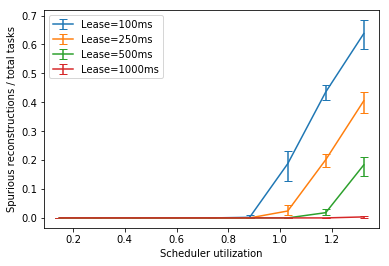

In [11]:
import matplotlib.pyplot as plt
import numpy as np

DIRECTORY = "results-lease"

def plot(plt, results, label):

    throughputs = np.array(sorted(results.keys()))
    means = []
    yerr_low = []
    yerr_high = []
    for tick in throughputs:
        mean = np.mean(results[tick])
        means.append(mean)
        yerr_low.append(
            mean - np.quantile(results[tick], 0.025)
        )
        yerr_high.append(
            np.quantile(results[tick], 0.975) - mean
        )
    throughputs = throughputs / 3400
    plt.errorbar(throughputs, means, yerr=[yerr_low, yerr_high], capsize=4, label=label)

results = parse_results(DIRECTORY, "lease-reconstructions.csv")
lease_times = sorted(results.keys())
for lease_time in lease_times:
    plot(plt, results[lease_time], "Lease={}ms".format(int(lease_time)))

plt.ylabel("Spurious reconstructions / total tasks")
plt.xlabel("Scheduler utilization")
plt.legend()

# plt.show()
plt.savefig("/home/stephanie/ray-fork/results/{}/lease-reconstructions.pdf".format(DIRECTORY))